Ladataan tarvittavat kirjastot:

> pandas; matematiikkakirjasto - https://pandas.pydata.org/

> numpy; toinen matematiikkakirjasto - https://numpy.org/doc/

> matplotlib; visualisointikirjasto - https://matplotlib.org/

> seaborn; visualisointikirjasto - https://seaborn.pydata.org/


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
dat = pd.read_csv("https://raw.githubusercontent.com/rerkki/metropolia/master/oura_trends.csv", encoding='latin-1')

dat[0:10] #tulostetaan otsikko ja 10 ensimmäistä riviä tarkistuksen vuoksi


,date,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Sleep Tranquility Score,Sleep Latency Score,Sleep Timing Score,Total Bedtime,Total Sleep Time,Awake Time,REM Sleep Time,Light Sleep Time,Deep Sleep Time,Restless Sleep,Sleep Efficiency,Sleep Latency,Sleep Timing,Sleep Timing.1,Bedtime Start,Bedtime End,Average Resting Heart Rate,Lowest Resting Heart Rate,Average HRV,Temperature Deviation,Respiratory Rate,Activity Score,Stay Active Score,Move Every Hour Score,Meet Daily Targets Score,Training Frequency Score,Training Volume Score,Recovery Time Score,Activity Burn,Total Burn,Target Calories,Steps,Daily Movement,Inactive Time,Rest Time,Low Activity Time,Medium Activity Time,High Activity Time,Non-wear Time,Average MET,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
0,2020-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,100,100,1,1,1,100,11,1953,500,282,206,35,254,13,0,0,1138,1.15625,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-26,70.0,66.0,71.0,56.0,67.0,66.0,78.0,96.0,28680.0,22380.0,6300.0,4740.0,14820.0,2820.0,25.0,78.0,390.0,13200.0,NaN,2020-03-25T23:27:09+02:00,2020-03-26T07:25:09+02:00,51.17,49.0,64.0,-0.33,13.750,48,63,100,1,1,24,100,291,2343,550,6973,5721,655,495,206,28,0,56,1.34375,0,88.0,66.0,0.0,0.0,0.0,94.0,100.0,90.0,100.0
2,2020-03-27,76.0,76.0,75.0,95.0,79.0,63.0,67.0,79.0,29940.0,24870.0,5070.0,4950.0,15090.0,4830.0,36.0,83.0,180.0,15540.0,NaN,2020-03-26T23:22:40+02:00,2020-03-27T07:41:40+02:00,58.00,52.0,78.0,-0.10,14.000,50,60,95,1,1,46,100,315,2347,400,7943,6095,673,559,167,41,0,0,1.34375,1,82.0,74.0,88.0,86.0,95.0,100.0,78.0,93.0,52.0
3,2020-03-28,68.0,63.0,70.0,59.0,93.0,67.0,62.0,74.0,24300.0,21690.0,2610.0,4650.0,14100.0,2940.0,28.0,89.0,60.0,11730.0,NaN,2020-03-28T00:35:01+02:00,2020-03-28T07:20:01+02:00,61.91,56.0,48.0,-0.20,14.625,58,55,95,1,40,73,100,321,2331,400,8198,6113,669,578,141,52,0,0,1.34375,1,74.0,63.0,83.0,84.0,91.0,98.0,47.0,90.0,53.0
4,2020-03-29,69.0,73.0,95.0,49.0,65.0,68.0,70.0,55.0,31320.0,24180.0,7140.0,6300.0,15420.0,2460.0,26.0,77.0,210.0,14100.0,NaN,2020-03-29T00:33:01+03:00,2020-03-29T09:15:01+03:00,52.38,48.0,71.0,-0.33,14.375,71,100,100,1,71,95,100,296,2251,500,7598,5896,161,591,71,60,0,557,1.28125,0,85.0,65.0,84.0,84.0,89.0,94.0,100.0,NaN,89.0
5,2020-03-30,71.0,69.0,60.0,85.0,67.0,66.0,67.0,90.0,29880.0,23160.0,6720.0,3990.0,14970.0,4200.0,31.0,78.0,180.0,13650.0,NaN,2020-03-29T23:31:32+03:00,2020-03-30T07:49:32+03:00,53.91,48.0,78.0,0.11,13.875,65,56,78,1,96,96,100,409,2438,500,9764,7999,657,534,188,61,0,0,1.40625,2,87.0,68.0,83.0,94.0,89.0,95.0,100.0,95.0,83.0
6,2020-03-31,69.0,75.0,77.0,13.0,72.0,66.0,72.0,95.0,30540.0,24540.0,6000.0,5100.0,18810.0,630.0,29.0,80.0,270.0,14790.0,NaN,2020-03-30T23:02:31+03:00,2020-03-31T07:31:31+03:00,53.99,49.0,64.0,-0.13,14.625,58,41,25,1,100,97,100,340,2347,400,8271,6597,788,478,123,51,0,0,1.34375,5,81.0,65.0,83.0,80.0,85.0,100.0,100.0,NaN,68.0
7,2020-04-01,67.0,46.0,40.0,95.0,97.0,72.0,67.0,100.0,19080.0,17550.0,1530.0,2700.0,10200.0,4650.0,20.0,92.0,150.0,9420.0,NaN,2020-04-01T00:16:43+03:00,2020-04-01T05:34:43+03:00,54.98,51.0,64.0,-0.45,14.250,67,44,43,25,100,97,100,455,2530,400,11840,8997,805,367,195,73,0,0,1.46875,4,76.0,63.0,75.0,77.0,79.0,90.0,73.0,94.0,70.0
8,2020-04-02,64.0,54.0,49.0,48.0,81.0,67.0,70.0,100.0,23280.0,19500.0,3780.0,3270.0,13830.0,2400.0,28.0,84.0,210.0,10860.0,NaN,2020-04-01T23:42:12+03:00,2020-04-02T06:10:12+03:00,60.47,54.0,46.0,-0.06,14.500,75,55,60,43,100,98,100,449,2523,400,11324,8698,683,463,191,67,0,36,1.46875,3,73.0,59.0,70.0,70.0,74.0,100.0,65.0,89.0,90.0
9,2020-04-03,77.0,73.0,59.0,93.0,90.0,72.0,70.0,96.0,27360.0,24060.0,3300.0,3960.0,15540.0,4560.0,27.0,88.0,240.0,13740.0,NaN,2020-04-02T23:18:32+03:00,2020-04-03T06:54:32+03:00,53.8

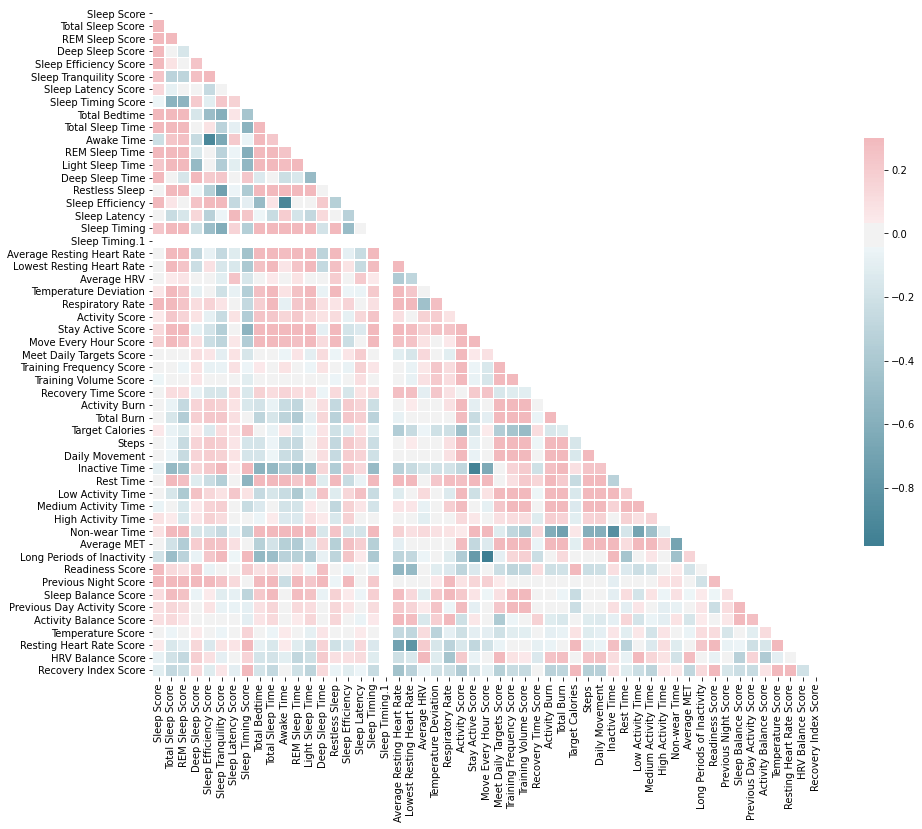

In [12]:
corr = dat.corr()
#mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

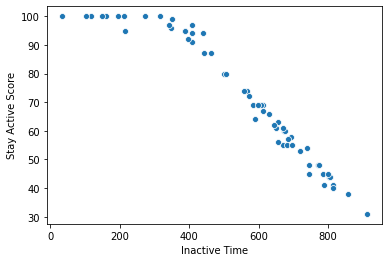

In [14]:
#sns.scatterplot(x=dat['Activity Burn'], y=dat['Total Burn'], data=dat, palette='Set1');
sns.scatterplot(x=dat['Inactive Time'], y=dat['Stay Active Score'], data=dat, palette='Set1');

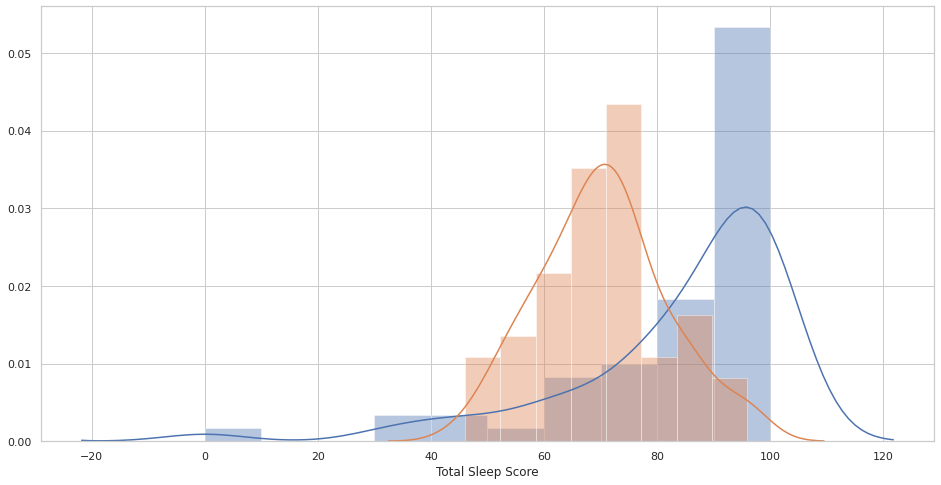

In [24]:
sns.set(style="whitegrid", rc={'figure.figsize':(16,8)})
ax1 = sns.distplot(dat['Resting Heart Rate Score'])
ax2 = sns.distplot(dat['Total Sleep Score'])
plt.show()

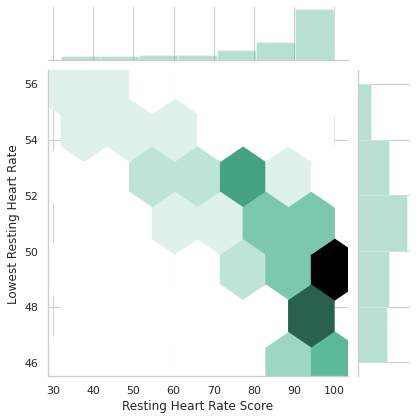

In [23]:
sns.jointplot(dat['Resting Heart Rate Score'], dat['Lowest Resting Heart Rate'], kind="hex", color="#4CB391")

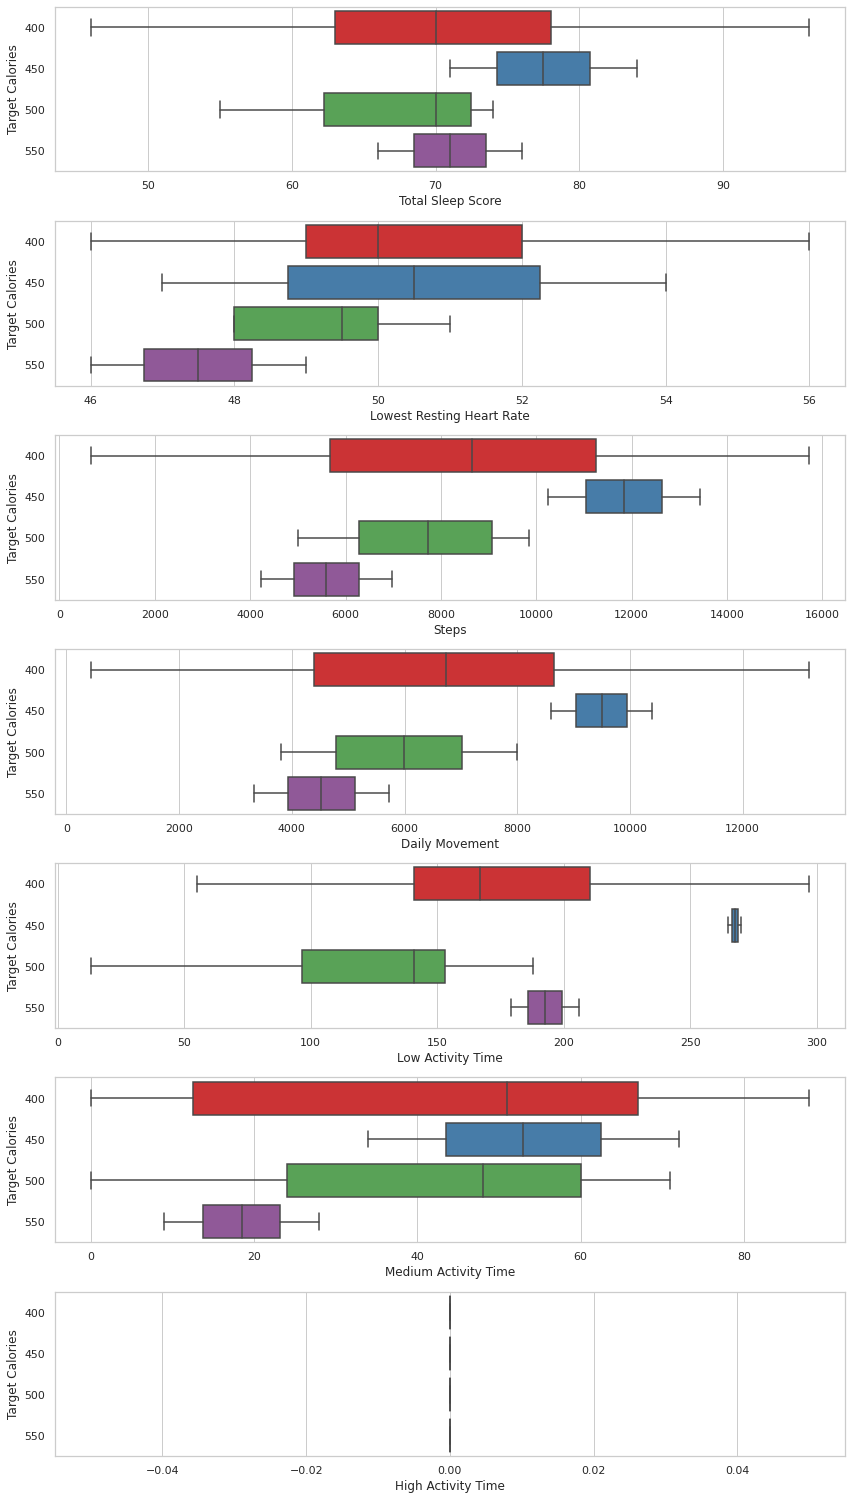

In [27]:
n_plots = 7       #KUVAAJIEN LUKUMÄÄRÄ, vaihda sen mukaan, montako kuvaajaa on

fig, axs = plt.subplots(n_plots,figsize=(12,n_plots*3)) #kuva-alueen muotoilu

#kopioi koodirivejä alle ja vaihda x-muuttujat uusiin koodiriveihin
sns.boxplot(y='Target Calories', x='Total Sleep Score', orient='h', data=dat, palette='Set1', showfliers = False, ax=axs[0]) # muista numeroida ax=axs[#] aina oikealla järjestysnumerolla
sns.boxplot(y='Target Calories', x='Lowest Resting Heart Rate', orient='h', data=dat, palette='Set1', showfliers = False, ax=axs[1])
sns.boxplot(y='Target Calories', x='Steps', orient='h', data=dat, palette='Set1', showfliers = False, ax=axs[2])
sns.boxplot(y='Target Calories', x='Daily Movement', orient='h', data=dat, palette='Set1', showfliers = False, ax=axs[3])
sns.boxplot(y='Target Calories', x='Low Activity Time', orient='h', data=dat, palette='Set1', showfliers = False, ax=axs[4])
sns.boxplot(y='Target Calories', x='Medium Activity Time', orient='h', data=dat, palette='Set1', showfliers = False, ax=axs[5])
sns.boxplot(y='Target Calories', x='High Activity Time', orient='h', data=dat, palette='Set1', showfliers = False, ax=axs[6])


plt.tight_layout()

In [ ]:

df = dat.fillna(dat.mean())

X = df[['Sleep Latency', 'Steps', 'Training Frequency Score']]
Y = df[['Total Sleep Score']]

X,Y


(    Sleep Latency  Steps  Training Frequency Score
 0      430.677966    282                         1
 1      390.000000   6973                         1
 2      180.000000   7943                         1
 3       60.000000   8198                        40
 4      210.000000   7598                        71
 ..            ...    ...                       ...
 57     180.000000  12215                        71
 58     450.000000   4650                        71
 59     210.000000   7531                        71
 60     960.000000  10330                        96
 61     390.000000   5421                        71
 
 [62 rows x 3 columns],     Total Sleep Score
 0           70.355932
 1           66.000000
 2           76.000000
 3           63.000000
 4           73.000000
 ..                ...
 57          84.000000
 58          65.000000
 59          87.000000
 60          66.000000
 61          56.000000
 
 [62 rows x 1 columns])

r2 =  0.05819538824852388
Regression coefficients:  [-7.88898569e-03 -9.34830085e-05  1.61399954e-02]


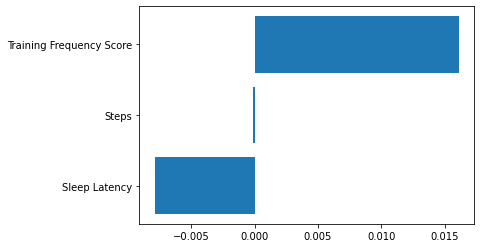

In [ ]:

labels = X.columns

LR = LinearRegression()
LR.fit(X,Y)
PRED=LR.predict(X)
R2 = r2_score(Y, PRED)
coef = LR.coef_[0]

print("r2 = ", R2)
print("Regression coefficients: ", coef)

plt.barh(labels,coef)
plt.show()